In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.0 MB/s eta 0:00:00


In [3]:
!pip install unidecode

In [4]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

## Import All Library

In [5]:
#----------SKLEARN--------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV


from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer,ClusteringScoreVisualizer
from sklearn.metrics import silhouette_score


#-------NLTK--------------
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
from contractions import fix
from nltk.util import ngrams

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

#-------TENSORFLOW---------
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, SimpleRNN, LSTM , GRU, Bidirectional, Embedding
from keras.layers import Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import pytesseract
import re

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Data

In [6]:
path = "/kaggle/input/bbc-full-text-document-classification/bbc/business/001.txt"

def read_extract_text_file(path):
    with open(path,'r',encoding='latin-1') as file:
        data = file.readlines()
        text_data= " ".join(data)
    return text_data

read_extract_text_file(path)

'Ad sales boost Time Warner profit\n \n Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n \n The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n \n Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try

In [7]:
class_labels = {'politics':0, 'sport':1,  'tech':2, 'entertainment':3, 'business':4}
class_labels

{'politics': 0, 'sport': 1, 'tech': 2, 'entertainment': 3, 'business': 4}

In [8]:
path = "/kaggle/input/bbc-full-text-document-classification/bbc"
folder = os.listdir(path)

final_text = []
final_label = []

for label in folder:
    #print(label)
    new_path = os.path.join(path,label)
    if new_path.endswith("README.TXT"):
        #print(new_path)
        continue
    else:
        for j in os.listdir(new_path):
            #print(j)
            new_path1 = os.path.join(new_path,j)
            text = read_extract_text_file(new_path1)
            final_text.append(text)
            final_label.append(class_labels[label])

In [9]:
print(len(final_text))
print(len(final_label))

2225
2225


In [10]:
final_label[:5]

[0, 0, 0, 0, 0]

In [11]:
df = pd.DataFrame()
df['Text'] = final_text
df['Label'] = final_label

df

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
...,...,...
2220,India opens skies to competition\n \n India wi...,4
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4
2222,Survey confirms property slowdown\n \n Governm...,4
2223,High fuel prices hit BA's profits\n \n British...,4


In [12]:
df.to_csv("df_file.csv",index=False)

In [13]:
df['Label'].value_counts()

Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

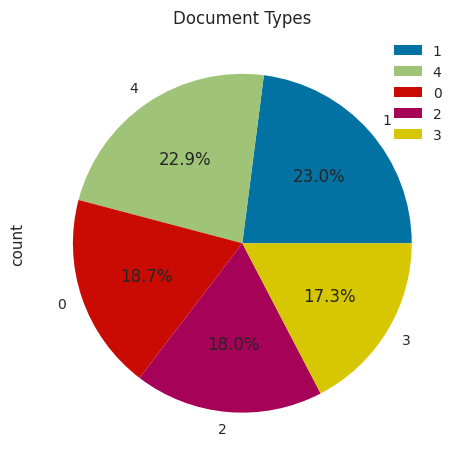

In [14]:
df['Label'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Document Types")
plt.legend()
plt.show()

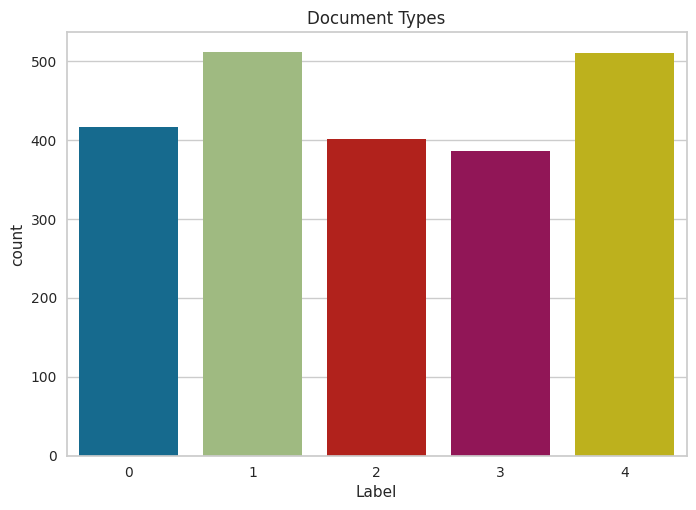

In [15]:
sns.countplot(x=df['Label'])
plt.title("Document Types")
plt.show()

## Data Preprocessing

In [16]:
stopwords_list = stopwords.words('english')
len(stopwords_list)

179

In [17]:
import re

def preprocess_data(text):
    text = text.lower()
    text = text.replace("\n"," ").replace("\t"," ")
    text = re.sub("\s+"," ",text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # tokens
    tokens = word_tokenize(text)
    
    data = [i for i in tokens if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in data:
        word = lemmatizer.lemmatize(i)
        final_text.append(word)
        
    return " ".join(final_text)


## Split The Data For Train & Test Purpose

In [18]:
x_train, x_test,y_train,y_test = train_test_split(df['Text'],df['Label'],test_size=0.10, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2002,)
(223,)
(2002,)
(223,)


In [19]:
x_train

870     Arnesen denies rift with Santini\n \n Tottenha...
1655    Double eviction from Big Brother\n \n Model Ca...
270     Whitehall shredding increasing - Tories\n \n C...
1403    Film row over Pirates 'cannibals'\n \n Plans t...
16      Ministers deny care sums 'wrong'\n \n Minister...
                              ...                        
1263    DVD copy protection strengthened\n \n DVDs wil...
515     Scotland 18-10 Italy\n \n Six Chris Paterson p...
2077    Boeing unveils new 777 aircraft\n \n US aircra...
122     MP's shock at long lost daughter\n \n Labour M...
81      Boateng to step down at election\n \n Paul Boa...
Name: Text, Length: 2002, dtype: object

In [20]:
y_train

870     1
1655    3
270     0
1403    3
16      0
       ..
1263    2
515     1
2077    4
122     0
81      0
Name: Label, Length: 2002, dtype: int64

In [21]:
clean_train = x_train.apply(preprocess_data)
clean_test = x_test.apply(preprocess_data)

In [22]:
clean_train

870     arnesen denies rift santini tottenham sporting...
1655    double eviction big brother model caprice holb...
270     whitehall shredding increasing tory civil serv...
1403    film row pirate cannibal plan portray dominica...
16      minister deny care sum wrong minister insisted...
                              ...                        
1263    dvd copy protection strengthened dvd harder co...
515     scotland italy six chris paterson penalty gave...
2077    boeing unveils new aircraft u aircraft firm bo...
122     mp shock long lost daughter labour mp stephen ...
81      boateng step election paul boateng chief secre...
Name: Text, Length: 2002, dtype: object

In [23]:
clean_test

702     moya emotional davis cup win carlos moya descr...
944     mobile rack year use mobile phone uk celebrati...
478     candela completes bolton switch bolton bos sam...
1260    blog take mainstream web log blog everywhere l...
1804    yukos drop bank court bid russian oil company ...
                              ...                        
693     anelka eye man city departure striker nicolas ...
680     white prepared battle toughscrummaging prop ju...
530     jones doping probe begin investigation doping ...
24      hitler row welsh art cash artist critical wels...
2208    uk home hit â trillion total value uk housing ...
Name: Text, Length: 223, dtype: object

## WordCloud

In [24]:
def generate_wordcloud(data,column):
    str_text=data[column].str.cat(sep=" ")    # we have to convert all review into single string
    wordcloud=WordCloud(width=500,height=300,background_color='Gold').generate(str_text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

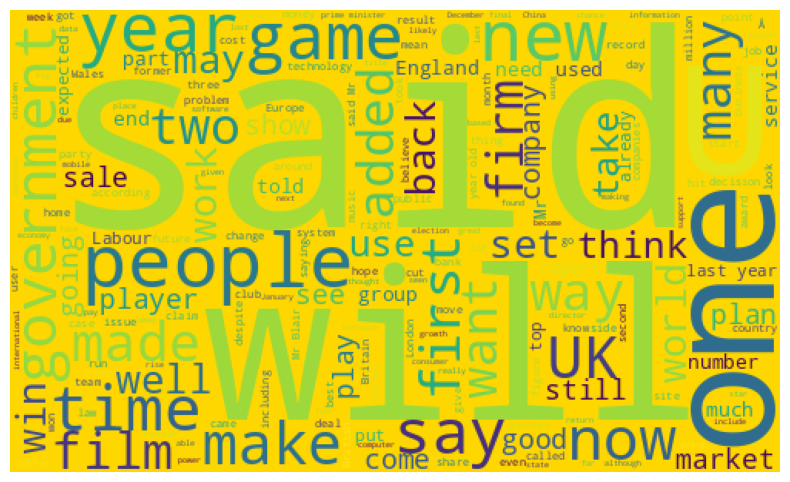

In [25]:
generate_wordcloud(df,"Text")

## TFIDF

In [37]:
tfidf = TfidfVectorizer(ngram_range=(1,5),max_df=0.95, max_features=15000)

tfidf_train = tfidf.fit_transform(clean_train)
tfidf_test = tfidf.transform(clean_test)

In [38]:
tfidf_train.A.shape

(2002, 15000)

In [39]:
tfidf_train.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model Build

In [40]:
lg_model = LogisticRegression()
lg_model.fit(tfidf_train, y_train)

LogisticRegression()

In [41]:
y_pred = lg_model.predict(tfidf_test)
y_pred

array([1, 2, 1, 2, 4, 4, 3, 4, 1, 2, 0, 3, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0,
       2, 1, 3, 3, 0, 1, 2, 1, 0, 1, 4, 3, 2, 2, 1, 0, 1, 2, 4, 4, 4, 4,
       3, 1, 1, 1, 0, 4, 2, 3, 3, 4, 1, 4, 1, 2, 2, 1, 4, 0, 0, 1, 0, 4,
       1, 0, 4, 2, 0, 3, 0, 0, 4, 1, 3, 0, 0, 0, 2, 4, 0, 0, 3, 0, 3, 1,
       1, 3, 1, 4, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 4, 4, 3, 3, 0, 1, 0,
       1, 2, 1, 3, 3, 4, 2, 2, 4, 0, 4, 0, 1, 4, 2, 1, 3, 0, 0, 4, 2, 4,
       2, 0, 2, 2, 4, 2, 4, 2, 0, 2, 1, 2, 1, 4, 4, 1, 3, 4, 0, 0, 4, 3,
       4, 4, 4, 2, 1, 0, 3, 3, 1, 2, 4, 4, 1, 0, 4, 4, 4, 2, 4, 2, 1, 3,
       4, 2, 0, 1, 0, 4, 2, 3, 0, 4, 4, 1, 4, 1, 1, 4, 2, 4, 3, 3, 3, 1,
       2, 3, 4, 4, 2, 3, 2, 4, 0, 2, 2, 2, 2, 0, 0, 3, 2, 3, 3, 3, 1, 1,
       1, 0, 4])

In [42]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
print(f"Accuracy On Test Data: {accuracy_score(y_test,y_pred)*100:.2f}")

Confusion Matrix:
 [[42  0  0  0  1]
 [ 0 49  0  0  0]
 [ 1  0 46  0  0]
 [ 0  0  0 33  0]
 [ 1  0  0  0 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       1.00      1.00      1.00        49
           2       1.00      0.98      0.99        47
           3       1.00      1.00      1.00        33
           4       0.98      0.98      0.98        51

    accuracy                           0.99       223
   macro avg       0.99      0.99      0.99       223
weighted avg       0.99      0.99      0.99       223


Accuracy On Test Data: 98.65


## User Input

In [43]:
class_labels

{'politics': 0, 'sport': 1, 'tech': 2, 'entertainment': 3, 'business': 4}

In [44]:
labels = list(class_labels.keys())
labels

['politics', 'sport', 'tech', 'entertainment', 'business']

### Function to take input and predict output

In [55]:

def predict_result(path):
    text_data = read_extract_text_file(path)
    clean_text_data = preprocess_data(text_data)
    
    # TFIDF
    tfidf_data = tfidf.transform([clean_text_data])
    # Model
    y_pred = lg_model.predict(tfidf_data.A)
    result = f"Given Document Is Related To : {labels[y_pred[0]]}"
    return result


In [56]:
path = "/kaggle/input/bbc-full-text-document-classification/bbc/sport/001.txt"

predict_result(path)

'Given Document Is Related To : sport'

In [57]:
import json
import pickle

In [58]:
with open("tfidf_file.pickle","wb") as file:
    pickle.dump(tfidf, file)

In [60]:
with open("model_bbc.pickle","wb") as file1:
    pickle.dump(lg_model, file1)